In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#맑은 고딕 적용
matplotlib.rc('font', family = 'Malgun Gothic')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/HMEQ.CSV")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [5]:
# train, test 분리
df_train, df_test = train_test_split(df_raw, test_size= 0.3, random_state=1234)
print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


In [6]:
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ +
                               DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""",df_train)
                               
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Wed, 24 Nov 2021   Pseudo R-squ.:                  0.2257
Time:                        16:36:35   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [7]:
y_pred = log_result.predict(df_test)

y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
dtype: int32

# 로지스틱 회귀분석_실습(통신고객이탈)

In [2]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/통신고객이탈.CSV")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### 결측값 확인

In [3]:
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

#### 데이터 전처리

In [4]:
df_raw['CHURN'] = np.where(df_raw['CHURN'] == 'Active', 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### 데이터 분할

In [5]:
# train, test 분리
df_train, df_test = train_test_split(df_raw, test_size= 0.3, random_state=1234)
print('train data size : {}'.format(df_train.shape))
print('test data size : {}'.format(df_test.shape))

train data size : (651, 15)
test data size : (279, 15)


#### 로지스틱 회귀모델 및 회귀계수 검토

In [6]:
log_model = Logit.from_formula("""CHURN ~  C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) +
                               SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME+ WEEKEND_CALLS_NO
                              + WEEKEND_CALLS_TIME+ TOTAL_CALLS_NO + TOTAL_CALLS_TIME""",df_train)
                               
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                  0.5059
Time:                        15:10:17   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
Covariance Type:            nonrobust   LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1056   2065.445     -0.012      0.991   -4072.304    4024.093
C(GENDER)[T.M]   

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
# test 데이터 예측
y_pred = log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

530    0
534    0
699    0
641    0
319    0
dtype: int32

### 평가

In [40]:
print("Accuracy : {0:.3f}\n".format(accuracy_score(df_test['CHURN'], y_pred_class)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test['CHURN'], y_pred_class)))

print(classification_report(df_test['CHURN'], y_pred_class, digits = 3))

Accuracy : 0.914

Confusion Matrix : 
[[227   8]
 [ 16  28]]
              precision    recall  f1-score   support

           0      0.934     0.966     0.950       235
           1      0.778     0.636     0.700        44

    accuracy                          0.914       279
   macro avg      0.856     0.801     0.825       279
weighted avg      0.909     0.914     0.910       279



<AxesSubplot:>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


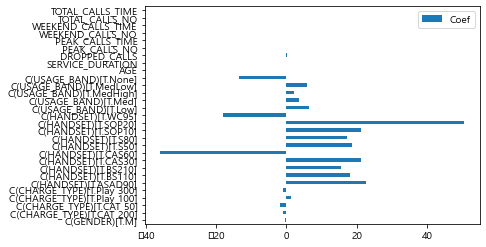

In [41]:
df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

#### 표준화 회귀계수

In [43]:
df_char = df_raw.select_dtypes(include='object')
df_numeric = df_raw.select_dtypes(exclude='object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns= df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,-0.489898,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,-0.489898,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,-0.489898,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,-0.489898,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,-0.489898,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [44]:
df_scaled['CHURN'] = np.where(df_scaled['CHURN']>0, 1, 0)
df_scaled.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CUSTOMER_ID,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,K102990,F,CAT 100,ASAD170,Med
1,0,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,K103280,M,CAT 100,S50,Med
2,0,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,K103660,M,CAT 100,ASAD170,Med
3,0,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,K103730,M,CAT 100,ASAD170,Med
4,0,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,K104560,F,CAT 100,S50,Med


In [45]:
# train, test 분리
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size= 0.3, random_state=1234)

In [46]:
scaled_log_model = Logit.from_formula("""CHURN ~  C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) +
                               SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME+ WEEKEND_CALLS_NO
                              + WEEKEND_CALLS_TIME+ TOTAL_CALLS_NO + TOTAL_CALLS_TIME""",df_scaled_train)
                               
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.5059
Time:                        11:59:14   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
Covariance Type:            nonrobust   LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -22.6857   2065.404     -0.011      0.991   -4070.804    4025.433
C(GENDER)[T.M]   

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


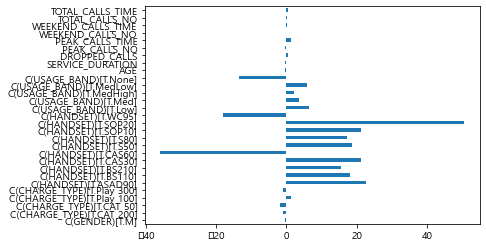

In [47]:
df_log_scaled_coef = pd.DataFrame({'Coef': scaled_log_result.params.values[1:]}, index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = 'Coef', legend = False)

# 의사결정나무(통신고객이탈)

In [7]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/통신고객이탈.CSV")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### 결측치 확인

In [8]:
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

#### 더미변수 생성

In [9]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["CHURN","CUSTOMER_ID"], axis = 1, inplace = False)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


#### 변수 역할 지정

In [10]:
# 변수 역할 지정
df_raw_y = df_raw["CHURN"] 
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "Active", 0, 1)

In [11]:
df_x_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


#### 데이터 분할

In [12]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


#### default parameter로 모델 생성

In [13]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.853


#### max_depth: 최대 깊이 변경에 따른 정확도 변화

In [14]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.839,0.860
1,2,0.866,0.889
2,3,0.889,0.910
3,4,0.892,0.910
4,5,0.920,0.903
5,6,0.931,0.875
6,7,0.951,0.860
7,8,0.959,0.842
8,9,0.963,0.853
9,10,0.972,0.857


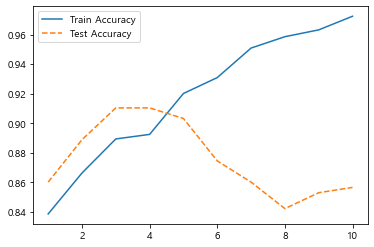

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [16]:
v_feature_name = df_train_x.columns

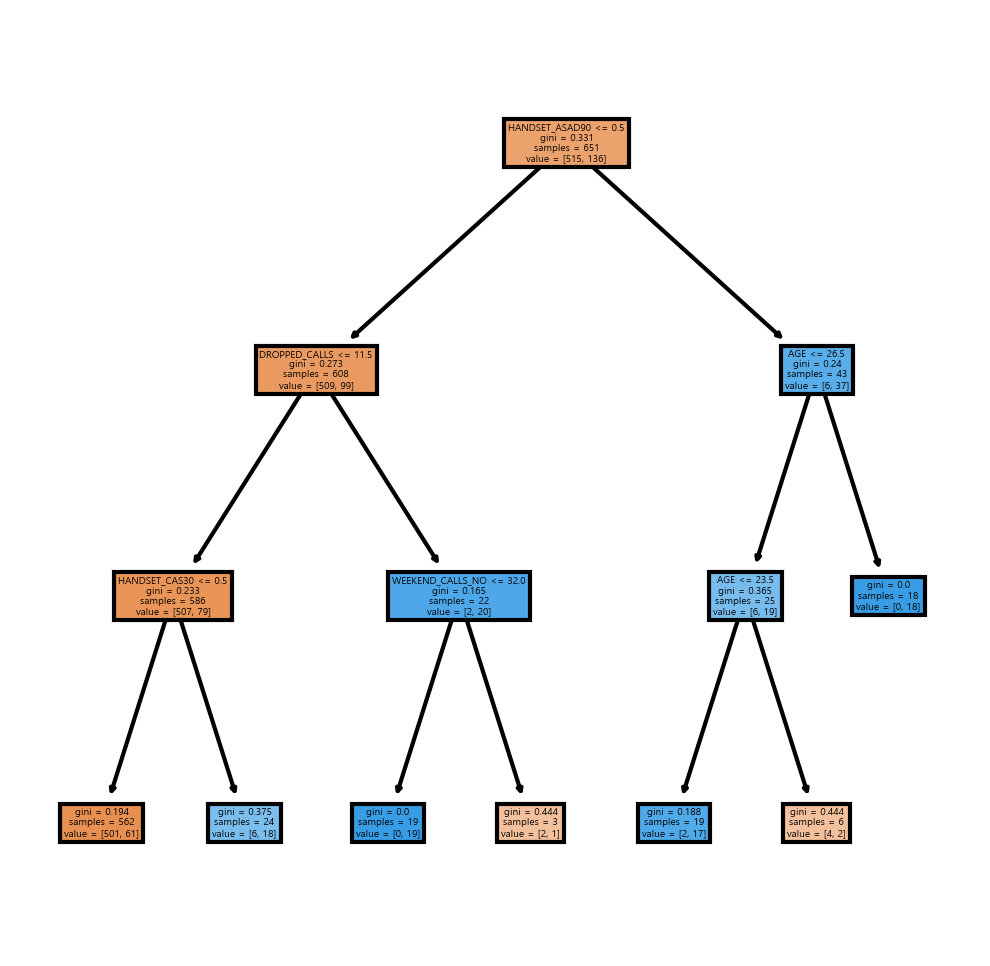

In [117]:
# 최대깊이 = 3모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth = 3 )
tree_graph.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

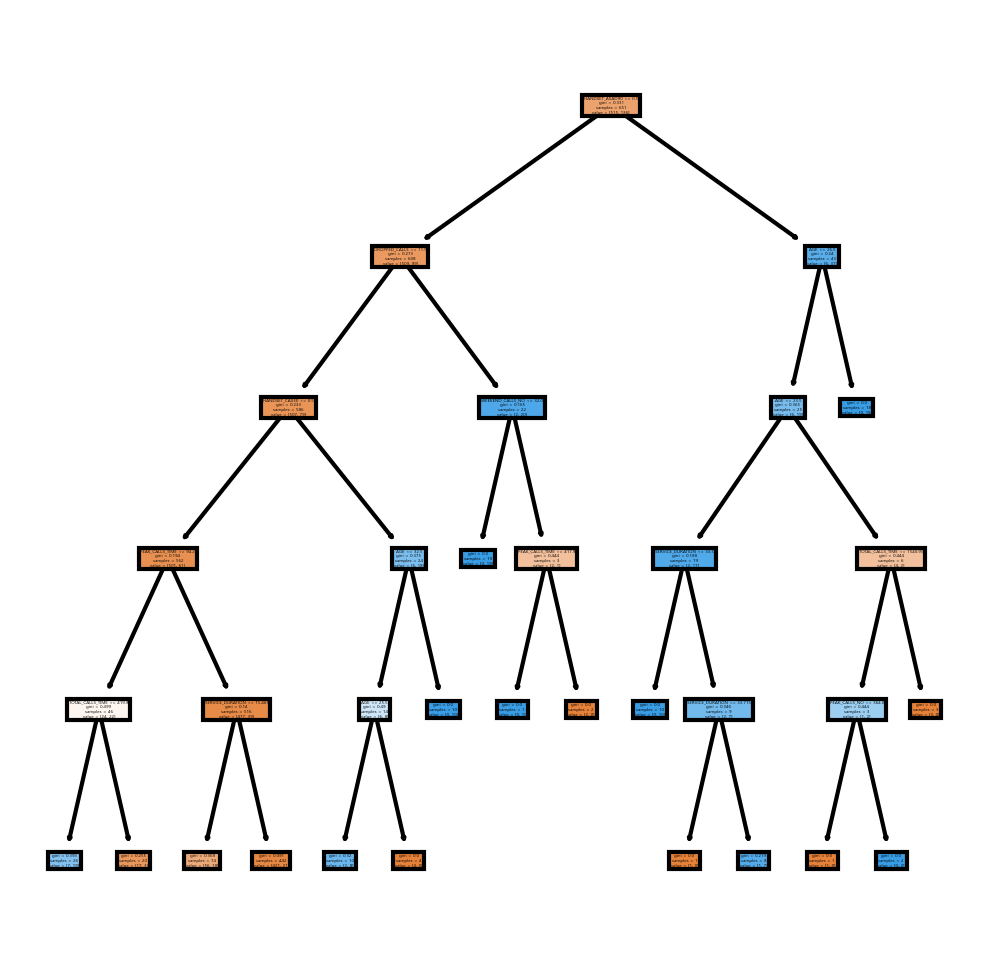

In [118]:
# 최대깊이 = 5모델
tree_graph = DecisionTreeClassifier(random_state=1234, max_depth = 5 )
tree_graph.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

In [33]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(10, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 3
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,20,0.889,0.910
1,22,0.889,0.910
2,24,0.888,0.914
3,26,0.885,0.914
4,28,0.885,0.914
5,30,0.885,0.914
6,32,0.885,0.914
7,34,0.885,0.914
8,36,0.885,0.914
9,38,0.885,0.914


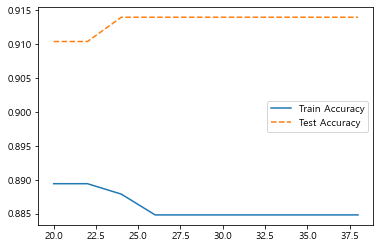

In [34]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [35]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 3, min_samples_split=22
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.889,0.910
1,4,0.888,0.907
2,6,0.888,0.914
3,8,0.885,0.910
4,10,0.885,0.914
5,12,0.885,0.914
6,14,0.885,0.914
7,16,0.885,0.914
8,18,0.885,0.914
9,20,0.885,0.914


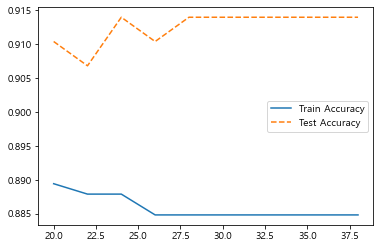

In [36]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

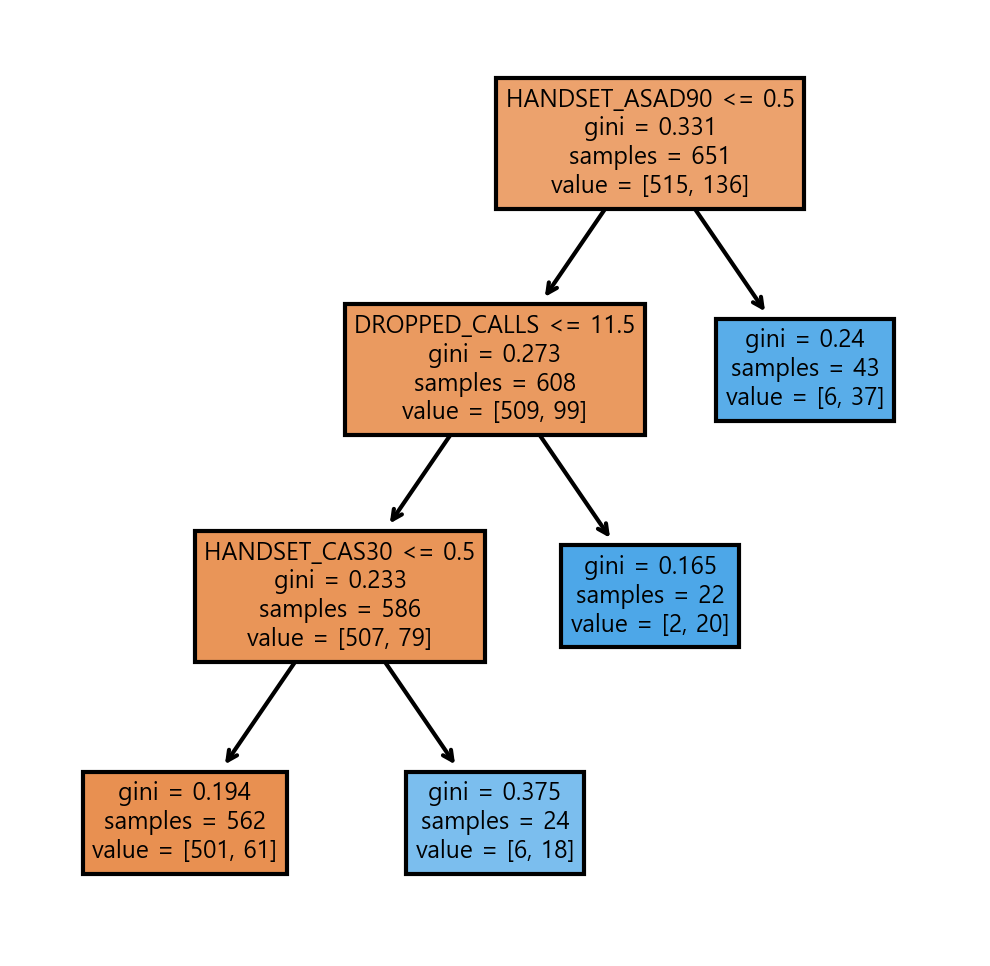

In [37]:
# 잎사귀 노드 최소 자료 수가 22인 모델
tree_low = DecisionTreeClassifier(random_state=1234, max_depth = 3,min_samples_split=22,min_samples_leaf=22 )
tree_low.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_low, feature_names = v_feature_name, filled = True);

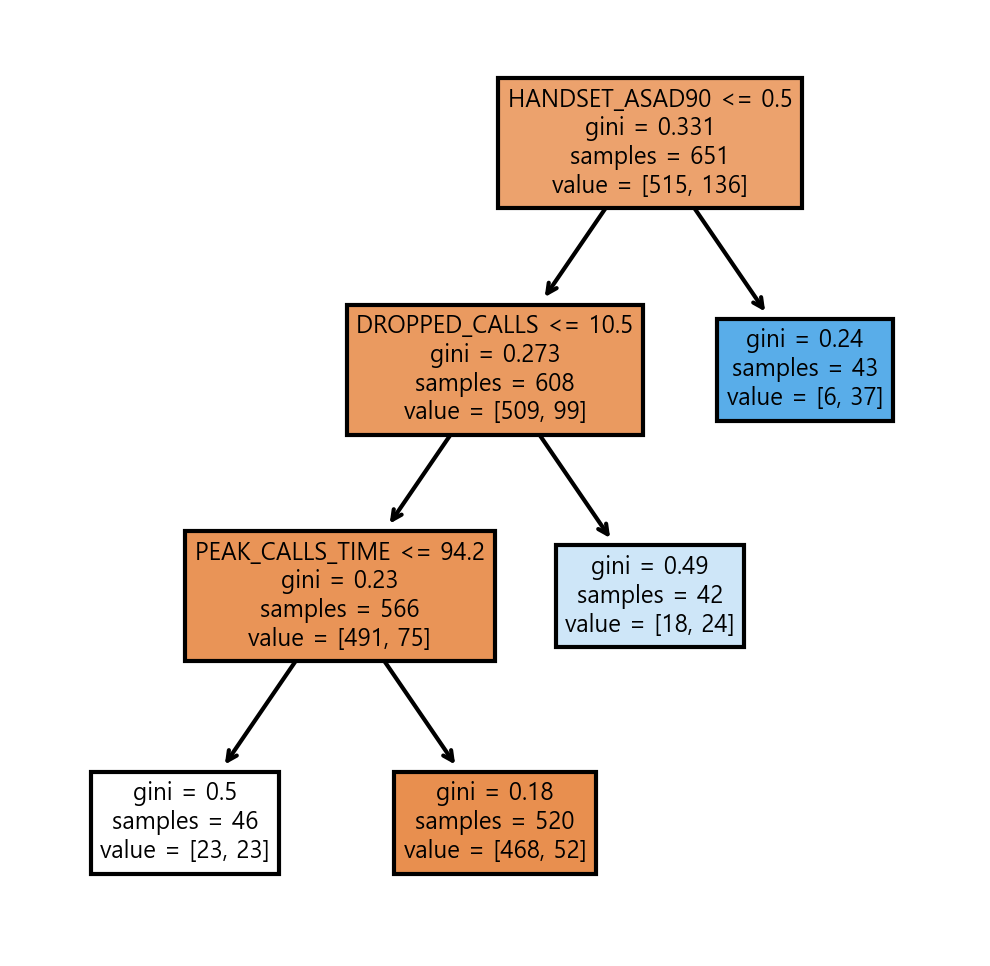

In [38]:
# 잎사귀 노드 최소 자료 수가 17인 모델
tree_high = DecisionTreeClassifier(random_state=1234, max_depth = 3,min_samples_split=22,min_samples_leaf=26)
tree_high.fit(df_train_x, df_train_y)


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_high, feature_names = v_feature_name, filled = True);

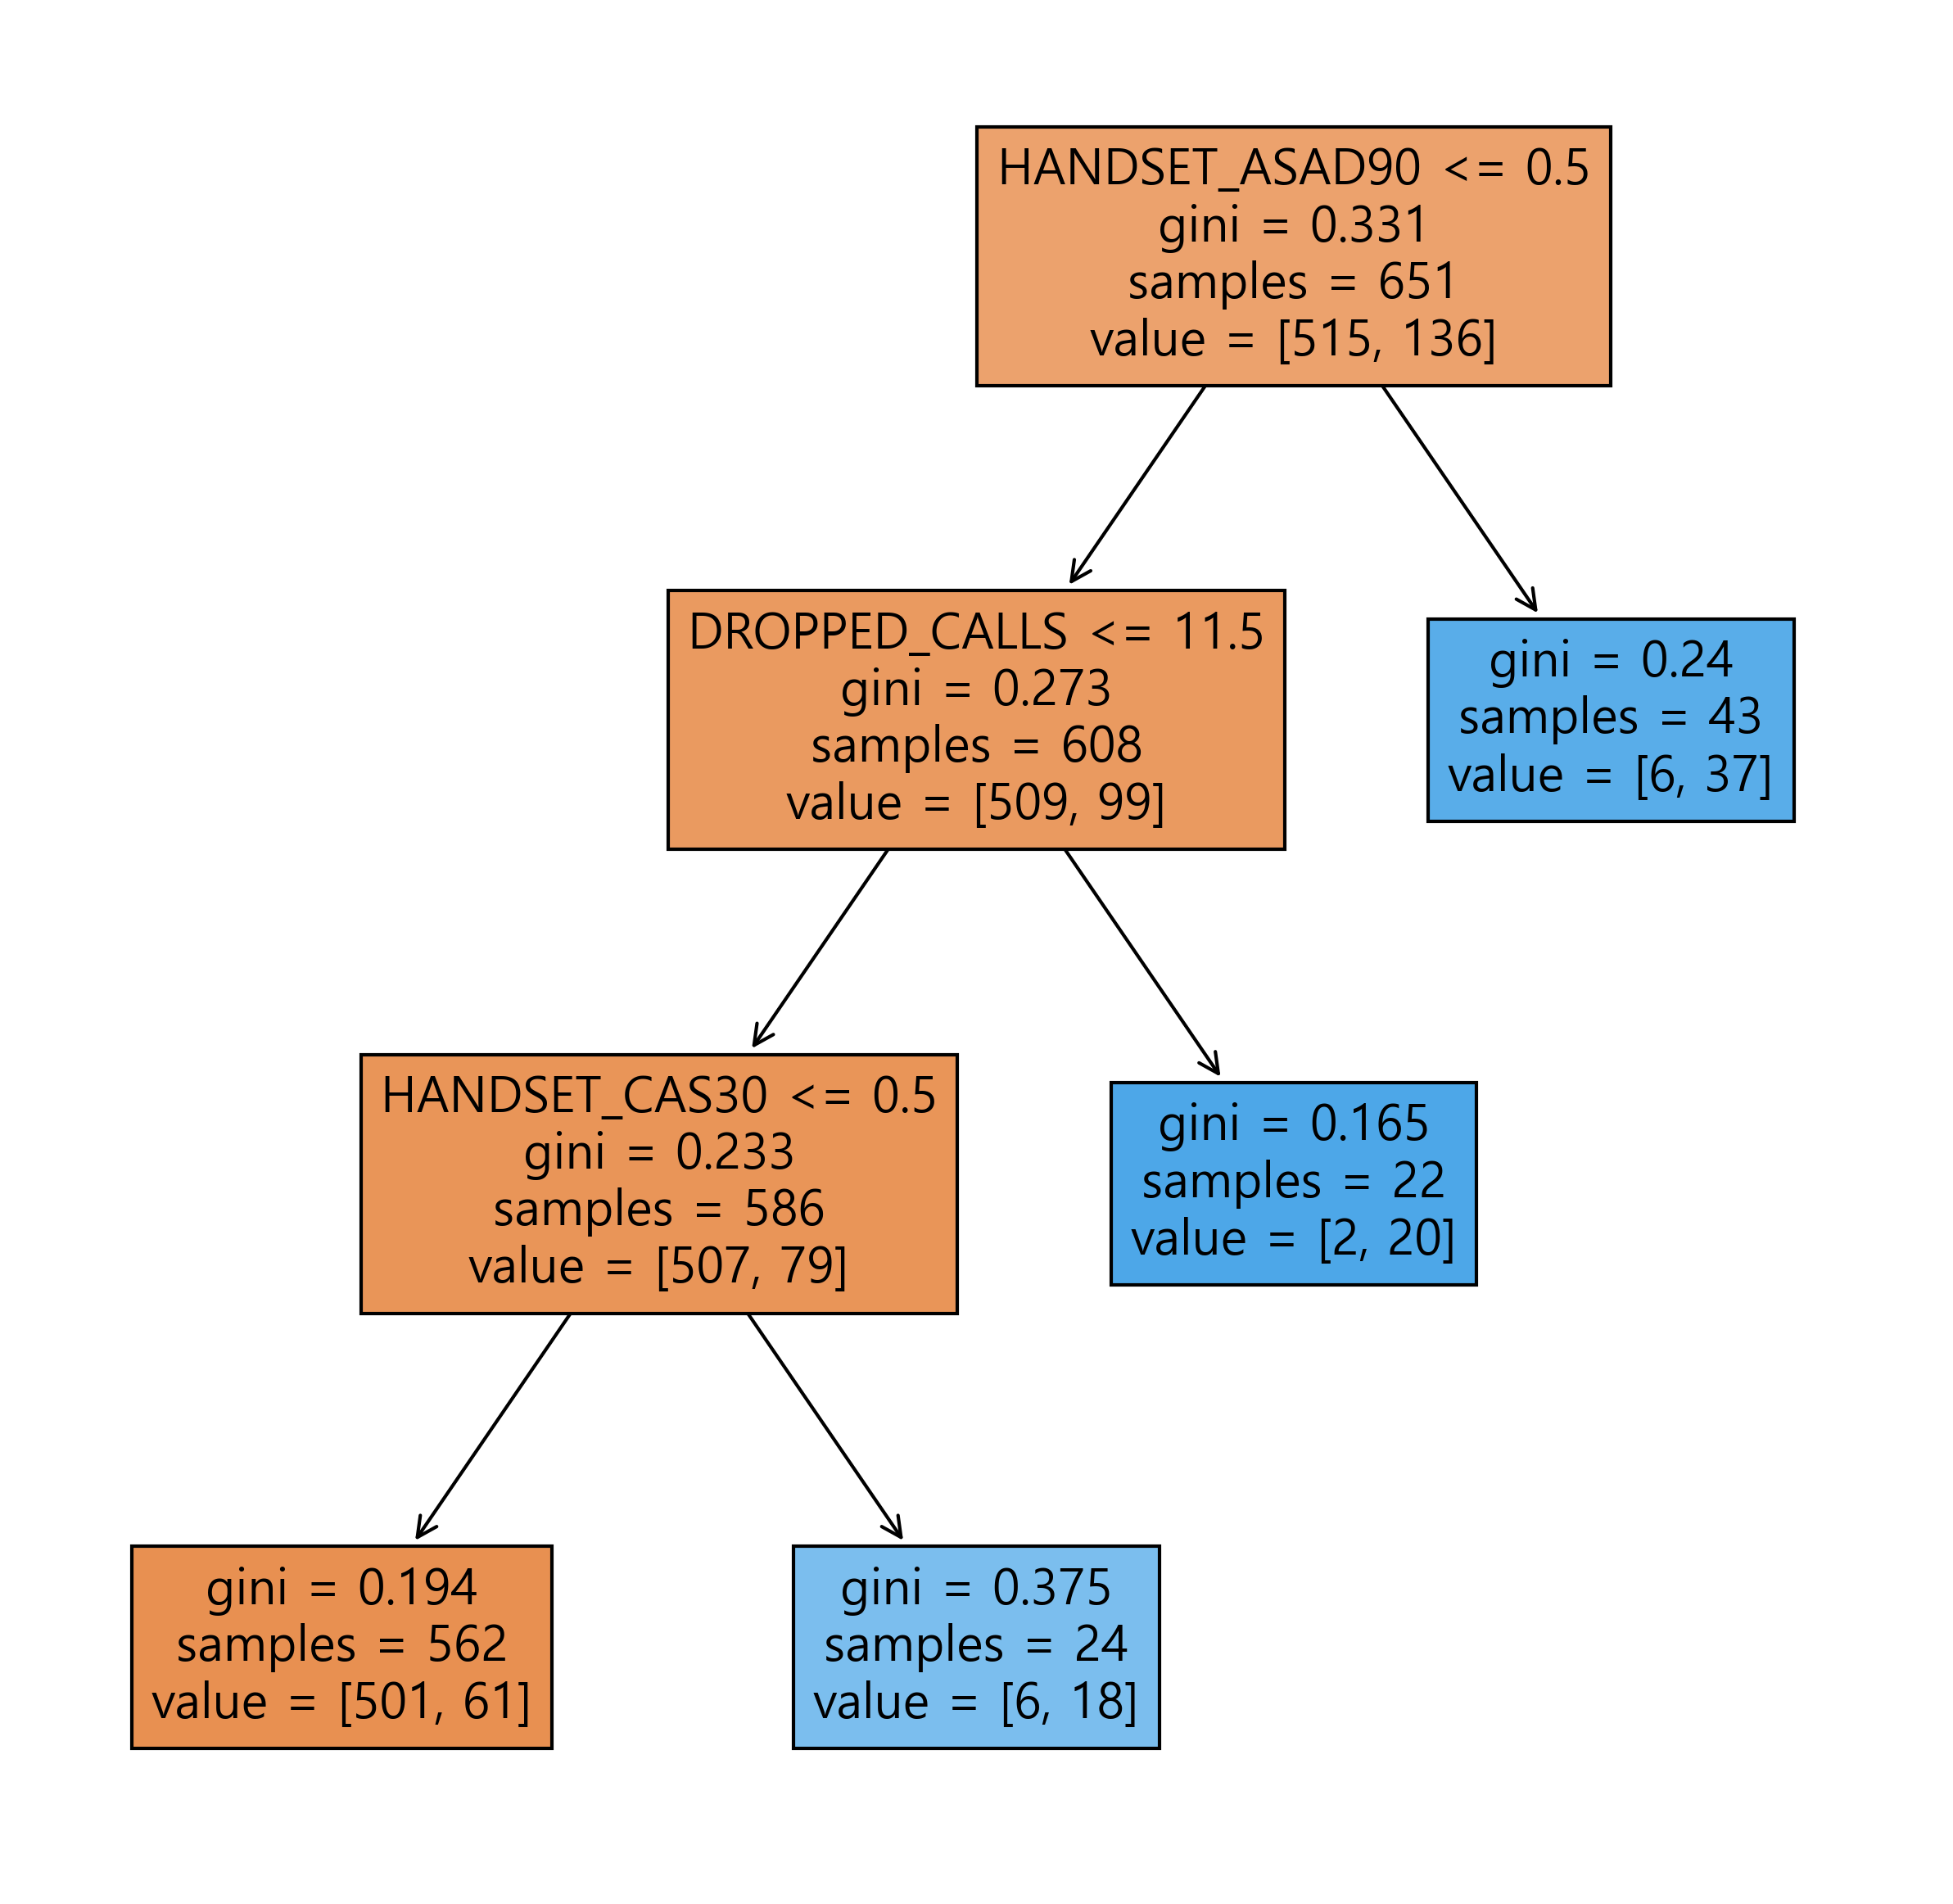

In [39]:
# 최종 모델
tree_final =DecisionTreeClassifier(min_samples_leaf = 22, min_samples_split = 22, max_depth = 3, random_state=1234 )
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);


In [40]:
# 평가
y_pred = tree_final.predict(df_test_x)

print('Accuracy : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy : 0.914
Confusion matrix : 
[[228   7]
 [ 17  27]]
              precision    recall  f1-score   support

           0      0.931     0.970     0.950       235
           1      0.794     0.614     0.692        44

    accuracy                          0.914       279
   macro avg      0.862     0.792     0.821       279
weighted avg      0.909     0.914     0.909       279



In [41]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.468
2,DROPPED_CALLS,0.305
20,HANDSET_CAS30,0.227
0,AGE,0.000
24,HANDSET_SOP10,0.000
19,HANDSET_BS210,0.000
21,HANDSET_CAS60,0.000
22,HANDSET_S50,0.000
23,HANDSET_S80,0.000
26,HANDSET_WC95,0.000


Text(0, 0.5, '설명변수')

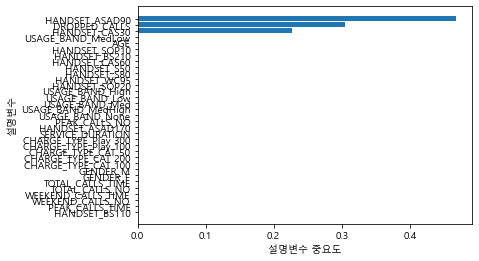

In [42]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [43]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator =DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20)

best parameter: 
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score: 
0.897


# 랜덤포레스트 실습(통신고객이탈)

In [127]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/통신고객이탈.CSV")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [128]:
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [129]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["CHURN","CUSTOMER_ID"], axis = 1, inplace = False)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,HANDSET_BS210,HANDSET_CAS30,HANDSET_CAS60,HANDSET_S50,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [130]:
# 변수 역할 지정
df_raw_y = df_raw["CHURN"] 
df_raw_y = np.where(df_raw_y == "Active", 0, 1)

In [132]:
# train, test 분리 ( x: 설명변수 , y : 목표변수,)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy ,# 설명변수
                                                                df_raw_y, # 목표변수
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


In [135]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.853


In [138]:
train_accuracy =[]
test_accuracy=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.988,0.867
1,20,0.997,0.878
2,30,1.000,0.896
3,40,1.000,0.896
4,50,1.000,0.903
5,60,1.000,0.896
6,70,1.000,0.910
7,80,1.000,0.910
8,90,1.000,0.907
9,100,1.000,0.910


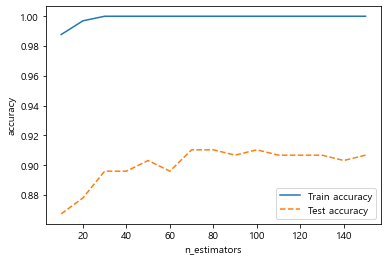

In [139]:
# 모델 설몀력 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [143]:
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators ,oob_score=True)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1- rf.oob_score_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

Text(0.5, 0, 'n_estimators')

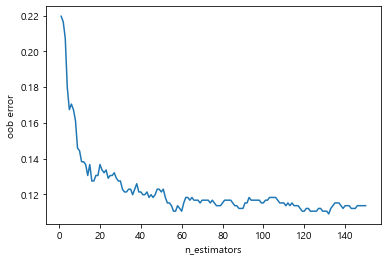

In [144]:
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [147]:
#n_estimators = 70

In [150]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 70)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.791,0.842
1,2,0.794,0.846
2,3,0.865,0.867
3,4,0.879,0.871
4,5,0.892,0.889
5,6,0.912,0.910
6,7,0.939,0.907
7,8,0.945,0.903
8,9,0.949,0.903
9,10,0.957,0.903


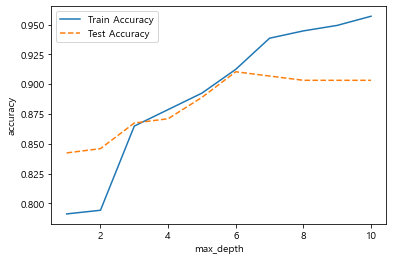

In [151]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [153]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, max_depth = 6, n_estimators = 70
                                 , min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.897,0.910
1,20,0.892,0.903
2,30,0.889,0.900
3,40,0.882,0.892
4,50,0.879,0.900
5,60,0.874,0.896
6,70,0.876,0.892
7,80,0.876,0.892
8,90,0.871,0.892
9,100,0.871,0.892


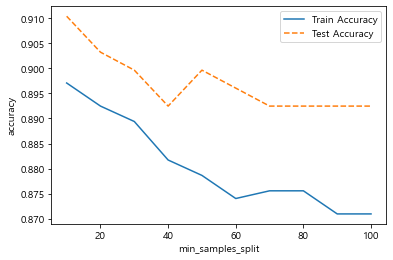

In [154]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.legend()

In [155]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth = 6, min_samples_split=30,n_estimators = 70
                                , min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,0.873,0.875
1,20,0.843,0.860
2,30,0.791,0.842
3,40,0.791,0.842
4,50,0.791,0.842
5,60,0.791,0.842
6,70,0.791,0.842
7,80,0.791,0.842
8,90,0.791,0.842
9,100,0.791,0.842


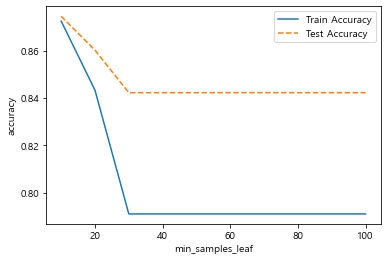

In [156]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [159]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, min_samples_split = 30, max_depth = 6, random_state=1234,
                                n_estimators =100)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.840
Accuracy on test set : 0.857
Confusion matrix : 
[[231   4]
 [ 36   8]]
              precision    recall  f1-score   support

           0      0.865     0.983     0.920       235
           1      0.667     0.182     0.286        44

    accuracy                          0.857       279
   macro avg      0.766     0.582     0.603       279
weighted avg      0.834     0.857     0.820       279



In [160]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.288
2,DROPPED_CALLS,0.113
8,TOTAL_CALLS_TIME,0.085
4,PEAK_CALLS_TIME,0.076
1,SERVICE_DURATION,0.069
3,PEAK_CALLS_NO,0.058
26,HANDSET_WC95,0.050
7,TOTAL_CALLS_NO,0.044
0,AGE,0.042
16,HANDSET_ASAD170,0.036


Text(0, 0.5, '설명변수')

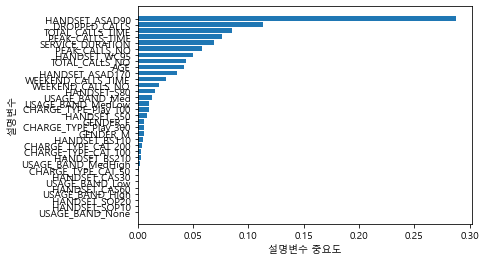

In [161]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [ ]:
# GridSearchCV를 이용한 최적 parameter 찾기

# 이 코드는 돌아가는데 시간이 매우 오래 걸림 - 원격이용하여 돌려야함

estimator = RandomForestClassifier(random_state=1234, n_estimators = 7)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth,"min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))
